In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table 

import os
import sys
sys.path.insert(0, os.path.abspath('./'))

from timeseries_util import DataUtil
from timeseries_util import VisualisationUtil
from timeseries_util import expand_window
from timeseries_util import compute_rmses

In [27]:
y = pd.read_csv('y.csv', header=None)[0]
y_hat_persistent = pd.read_csv('persistent_y_hat.csv', header=None)[0]
y_hat_lstm_with_season = pd.read_csv('lstm_with_season_y_hat.csv', header=None)[0]
y_hat_lstm_without_season = pd.read_csv('lstm_without_season_y_hat.csv', header=None)[0]
y_hat_mlp_with_season = pd.read_csv('mlp_with_season_y_hat.csv', header=None)[0]
y_hat_mlp_without_season = pd.read_csv('mlp_without_season_y_hat.csv', header=None)[0]
y_hat_fbprophet = pd.read_csv('fbprophet_y_hat.csv', header=None)[0]

grand_means = {}

* výsledné predikce 1. měsíce testovacích dat pro Persistent model:

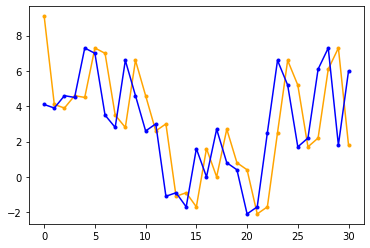

Overall mean RMSE: 2.728
Grand mean RMSE: 2.35


In [28]:
VisualisationUtil.plot_predictions(y, y_hat_persistent, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_persistent)
grand_means['persistent'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['persistent'])

* výsledné predikce 1. měsíce testovacích dat pro Fbprophet model:

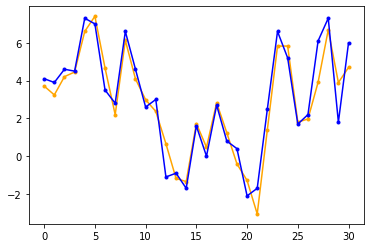

Overall mean RMSE: 0.890
Grand mean RMSE: 0.96


In [29]:
VisualisationUtil.plot_predictions(y, y_hat_fbprophet, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_fbprophet)
grand_means['fbprophet'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['fbprophet'])

* výsledné predikce 1. měsíce testovacích dat pro LSTM model se sezóními daty:

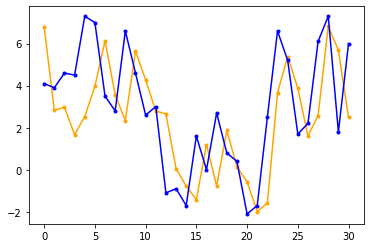

Overall mean RMSE: 2.497
Grand mean RMSE: 2.22


In [32]:
VisualisationUtil.plot_predictions(y, y_hat_lstm_with_season, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_lstm_with_season)
grand_means['lstm se sezóními daty'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['lstm se sezóními daty'])

* výsledné predikce 1. měsíce testovacích dat pro LSTM model bez sezónosti v datech:

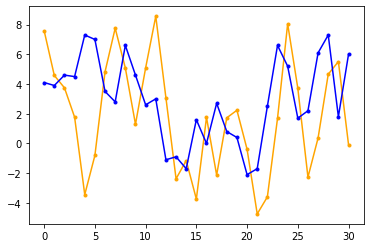

Overall mean RMSE: 4.210
Grand mean RMSE: 3.37


In [33]:
VisualisationUtil.plot_predictions(y, y_hat_lstm_without_season, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_lstm_without_season)
grand_means['lstm bez sezóních dat'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['lstm bez sezóních dat'])

* výsledné predikce 1. měsíce testovacích dat pro MLP model se sezóními daty:

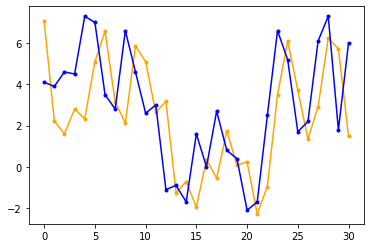

Overall mean RMSE: 2.621
Grand mean RMSE: 2.05


In [21]:
VisualisationUtil.plot_predictions(y, y_hat_mlp_with_season, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_mlp_with_season)
grand_means['mlp_with_season_model'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['mlp_with_season_model'])

* výsledné predikce 1. měsíce testovacích dat pro MLP model bez sezónosti v datech:

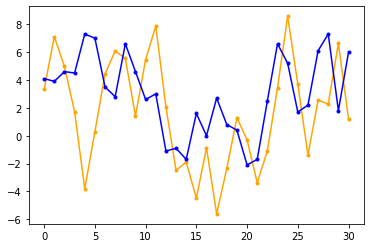

Overall mean RMSE: 4.071
Grand mean RMSE: 3.32


In [22]:
VisualisationUtil.plot_predictions(y, y_hat_mlp_without_season, to_index=31)
weekly_rmses = compute_rmses(y, y_hat_mlp_without_season)
grand_means['mlp_without_season_model'] = np.round(np.mean(weekly_rmses), decimals=2)
print('Grand mean RMSE:', grand_means['mlp_without_season_model'])

* výsledné ohodnocení modelů:

In [23]:
results = pd.DataFrame.from_dict(grand_means, orient='index', columns=['Grand mean RMSE'])
# results.plot.bar(rot=0)

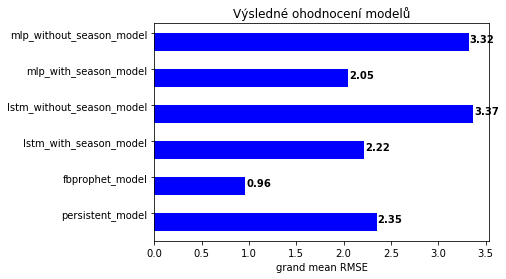

In [24]:
x = results.index
y = results['Grand mean RMSE']

fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Výsledné ohodnocení modelů')
plt.xlabel('grand mean RMSE')
      
for i, v in enumerate(y):
    ax.text(v + 0.01, i, str(v), color='black', fontweight='bold')

plt.savefig('results.pdf', dpi=300, format='pdf', bbox_inches='tight')